In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

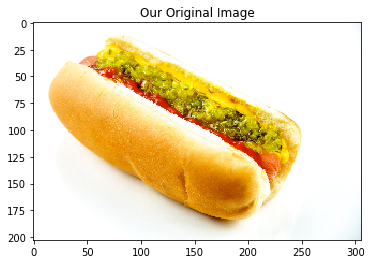

In [2]:
img = cv2.imread('test_img.jpg')
img = cv2.resize(img, (0,0), fx=0.1, fy=0.1)
cv2.imshow('img', img)

rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_img)
plt.title('Our Original Image')
plt.show()

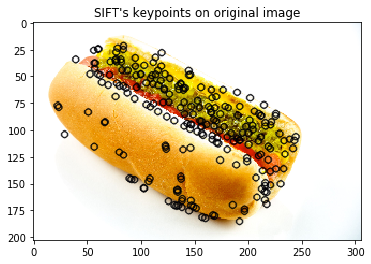

In [3]:
sift = cv2.xfeatures2d.SURF_create()
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
key_points = sift.detect(gray_img)
descriptors = sift.compute(gray_img, key_points)[1]
out_img = img.copy()
interest_points = cv2.drawKeypoints(img, key_points, out_img, cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

rgb_img = cv2.cvtColor(interest_points, cv2.COLOR_BGR2RGB)
plt.title("SIFT's keypoints on original image")
plt.imshow(rgb_img)
plt.show()

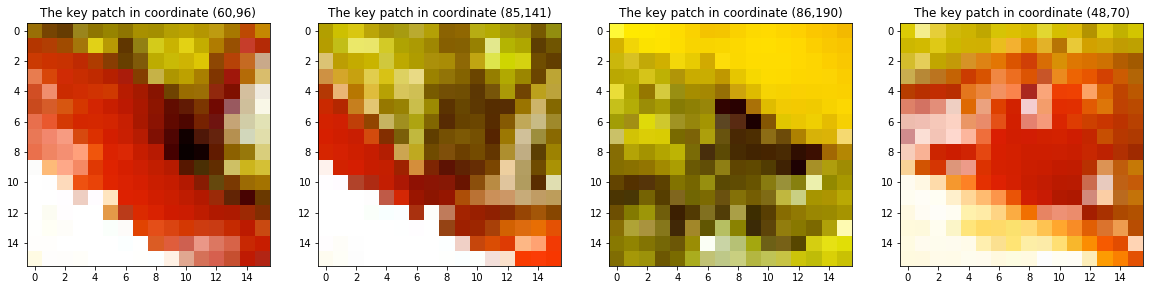

In [6]:
plt.figure(figsize=(20,20))
select_kp = key_points[:4]

for row, kp in enumerate(select_kp):    
    img_keypatch = img.copy()
    loc = int(kp.pt[0]), int(kp.pt[1])
    img_keypatch = img_keypatch[loc[1]-8:loc[1]+8, loc[0]-8:loc[0]+8]
    
    rgb_img = cv2.cvtColor(img_keypatch, cv2.COLOR_BGR2RGB)
    plt.subplot(1,4, row + 1)
    plt.title(f"The key patch in coordinate ({loc[1]},{loc[0]})")
    plt.imshow(rgb_img)

plt.show()